In [4]:
import pandas as pd
import numpy as np

import pandas_profiling
import matplotlib.pyplot as plt
# import seaborn
%matplotlib inline

## import 

In [5]:
%run import.ipynb

Each row in this dataset represents an insurance claim. You must predict the value for the `loss` column. Variables prefaced with `cat` are categorical, while those prefaced with `cont` are continuous.

## `pandas_profiling`

In [6]:
# %time rep = pandas_profiling.ProfileReport(df)
# rep.to_file('./pandas_profiling_report.html')

```CPU times: user 8.86 s, sys: 1.46 s, total: 10.3 s
Wall time: 1min 16s```

## Target variable

In [7]:
y.describe()

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

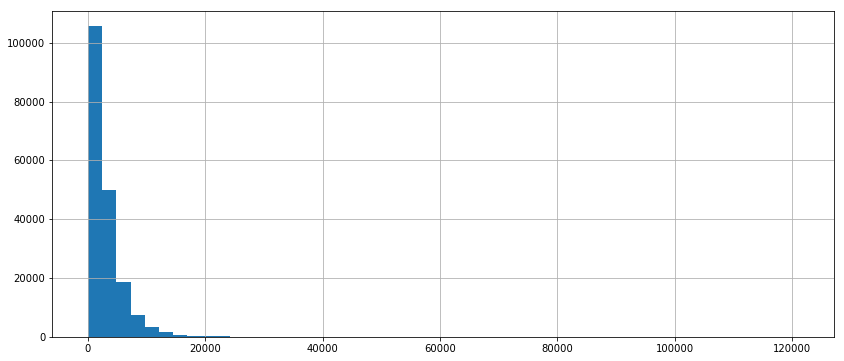

In [8]:
plt.figure(figsize = (14,6));
y.hist(bins = 50);

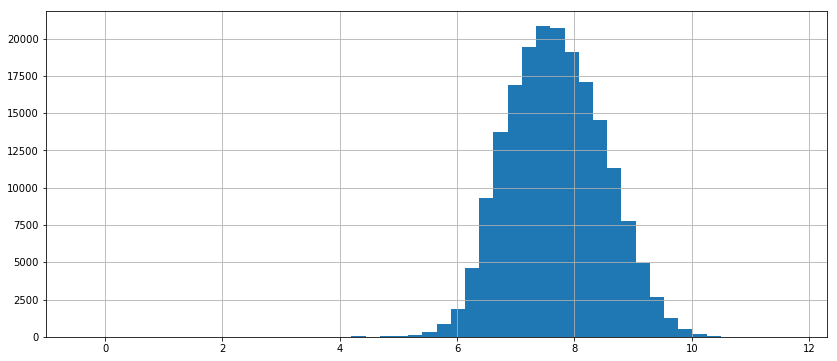

In [9]:
plt.figure(figsize = (14,6));
np.log(y).hist(bins = 50);

## Features

In [10]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(313864, 130)
Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
       'cat10',
       ...
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11',
       'cont12', 'cont13', 'cont14'],
      dtype='object', length=130)
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
cat30      object
           ...   
cat101     object
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat110     objec

### Categorical variables

In [11]:
cat_variables = [i for i in df.columns if df[i].dtype == 'O']
print(cat_variables)

# for var in cat_variables:
#     print('---------- %s --------' % var)
#     print('%s unique values' % len(df[var].unique()))
#     print('\n')
#     print(df[var].value_counts()[:5])
#     print('\n')

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111

### Numeric variables

In [12]:
num_variables = [i for i in df.columns if df[i].dtype == 'float64']
print(num_variables)

['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14']


In [13]:
round(df[num_variables].describe(), 4)

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,313864.0000,313864.0000,313864.0000,313864.0000,313864.0000,313864.0000,313864.0000,313864.0000,313864.0000,313864.0000,313864.0000,313864.0000,313864.0000,313864.0000
mean,0.4941,0.5071,0.4987,0.4920,0.4875,0.4914,0.4854,0.4868,0.4857,0.4984,0.4939,0.4935,0.4939,0.4957
std,0.1878,0.2071,0.2020,0.2111,0.2091,0.2054,0.1785,0.1994,0.1818,0.1859,0.2100,0.2097,0.2129,0.2225
min,0.0000,0.0011,0.0026,0.1769,0.2811,0.0127,0.0695,0.2369,0.0001,0.0000,0.0353,0.0362,0.0002,0.1786
25%,0.3474,0.3583,0.3370,0.3274,0.2811,0.3361,0.3513,0.3180,0.3590,0.3646,0.3110,0.3149,0.3158,0.2947
50%,0.4758,0.5558,0.5280,0.4529,0.4223,0.4409,0.4386,0.4411,0.4414,0.4612,0.4572,0.4623,0.3635,0.4070
75%,0.6253,0.6818,0.6342,0.6521,0.6433,0.6558,0.5912,0.6236,0.5689,0.6198,0.6789,0.6791,0.6900,0.7247
max,0.9850,0.8627,0.9443,0.9560,0.9837,0.9972,1.0000,0.9828,0.9954,0.9950,0.9987,0.9985,0.9885,0.8448


## Correlations

In [14]:
corrs = round(df[num_variables].corr(), 2)
corrs

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
cont1,1.00,-0.08,-0.45,0.37,-0.02,0.76,0.37,0.36,0.93,0.81,0.60,0.61,0.53,0.06
cont2,-0.08,1.00,0.46,0.04,0.19,0.02,0.05,0.14,-0.03,0.06,0.12,0.11,0.02,-0.05
cont3,-0.45,0.46,1.00,-0.34,0.09,-0.35,0.10,-0.18,-0.42,-0.33,0.02,0.00,-0.42,-0.04
cont4,0.37,0.04,-0.34,1.00,0.16,0.22,-0.11,0.53,0.33,0.28,0.12,0.13,0.18,0.02
cont5,-0.02,0.19,0.09,0.16,1.00,-0.15,-0.25,0.01,-0.09,-0.07,-0.15,-0.15,-0.08,-0.02
cont6,0.76,0.02,-0.35,0.22,-0.15,1.00,0.66,0.44,0.80,0.88,0.77,0.79,0.81,0.04
cont7,0.37,0.05,0.10,-0.11,-0.25,0.66,1.00,0.14,0.38,0.49,0.75,0.74,0.29,0.02
cont8,0.36,0.14,-0.18,0.53,0.01,0.44,0.14,1.00,0.45,0.34,0.30,0.32,0.48,0.04
cont9,0.93,-0.03,-0.42,0.33,-0.09,0.80,0.38,0.45,1.00,0.79,0.61,0.63,0.64,0.07
cont10,0.81,0.06,-0.33,0.28,-0.07,0.88,0.49,0.34,0.79,1.00,0.70,0.72,0.71,0.04


In [15]:
pairs = []

for var in num_variables:
    current = corrs.loc[(corrs[var] > 0.5) & (corrs[var] != 1.0) & (corrs[var].index > var), var]
    if len(current) == 0: 
        continue
    print('-' * 8, var)
    print(current)
    print('\n')
    for another_var in current.index:
        pairs.append((var, another_var))

-------- cont1
cont6     0.76
cont9     0.93
cont10    0.81
cont11    0.60
cont12    0.61
cont13    0.53
Name: cont1, dtype: float64


-------- cont4
cont8    0.53
Name: cont4, dtype: float64


-------- cont6
cont7    0.66
cont9    0.80
Name: cont6, dtype: float64


-------- cont10
cont6     0.88
cont9     0.79
cont11    0.70
cont12    0.72
cont13    0.71
Name: cont10, dtype: float64


-------- cont11
cont6     0.77
cont7     0.75
cont9     0.61
cont12    0.99
Name: cont11, dtype: float64


-------- cont12
cont6    0.79
cont7    0.74
cont9    0.63
Name: cont12, dtype: float64


-------- cont13
cont6    0.81
cont9    0.64
Name: cont13, dtype: float64




In [17]:
def draw(pair, df = df):
    title = "Correlation between %s and %s" % (pair)
    x, y = pair
    plt.figure()
    plt.scatter(df[x], df[y], s = 10, alpha = 0.3)
    plt.title(title)
    plt.ylabel(y)
    plt.xlabel(x)
    plt.show()

i = 1
for pair in pairs:
    print("%s. Correlation between %s and %s" % (i, pair[0], pair[1]))
    # draw(pair)
    print(df[pair[0]].corr(df[pair[1]]))
    i += 1

1. Correlation between cont1 and cont6
0.758326460886
2. Correlation between cont1 and cont9
0.930674516267
3. Correlation between cont1 and cont10
0.808348307861
4. Correlation between cont1 and cont11
0.596405610685
5. Correlation between cont1 and cont12
0.614665617378
6. Correlation between cont1 and cont13
0.533810576157
7. Correlation between cont4 and cont8
0.531245712385
8. Correlation between cont6 and cont7
0.658667075636
9. Correlation between cont6 and cont9
0.797387028427
10. Correlation between cont10 and cont6
0.883909963158
11. Correlation between cont10 and cont9
0.786035467257
12. Correlation between cont10 and cont11
0.703952766291
13. Correlation between cont10 and cont12
0.715013883522
14. Correlation between cont10 and cont13
0.707289715058
15. Correlation between cont11 and cont6
0.774715129609
16. Correlation between cont11 and cont7
0.74760459949
17. Correlation between cont11 and cont9
0.608502702751
18. Correlation between cont11 and cont12
0.994389812808
19.

## Correlations with `y`

In [19]:
X[num_variables].corrwith(y)

cont1    -0.010237
cont2     0.141528
cont3     0.111053
cont4    -0.035831
cont5    -0.011355
cont6     0.040967
cont7     0.119799
cont8     0.030508
cont9     0.014456
cont10    0.020236
cont11    0.099806
cont12    0.098724
cont13   -0.004022
cont14    0.019298
dtype: float64